<a href="https://colab.research.google.com/github/lightituphome/Anime-Recommendation/blob/main/Market_Basket_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori, association_rules

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

In [3]:
from google.colab import files
files.upload()

Saving groceries - groceries.csv to groceries - groceries.csv


{'groceries - groceries.csv': b'Item(s),Item 1,Item 2,Item 3,Item 4,Item 5,Item 6,Item 7,Item 8,Item 9,Item 10,Item 11,Item 12,Item 13,Item 14,Item 15,Item 16,Item 17,Item 18,Item 19,Item 20,Item 21,Item 22,Item 23,Item 24,Item 25,Item 26,Item 27,Item 28,Item 29,Item 30,Item 31,Item 32\r\n4,citrus fruit,semi-finished bread,margarine,ready soups,,,,,,,,,,,,,,,,,,,,,,,,,,,,\r\n3,tropical fruit,yogurt,coffee,,,,,,,,,,,,,,,,,,,,,,,,,,,,,\r\n1,whole milk,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,\r\n4,pip fruit,yogurt,cream cheese,meat spreads,,,,,,,,,,,,,,,,,,,,,,,,,,,,\r\n4,other vegetables,whole milk,condensed milk,long life bakery product,,,,,,,,,,,,,,,,,,,,,,,,,,,,\r\n5,whole milk,butter,yogurt,rice,abrasive cleaner,,,,,,,,,,,,,,,,,,,,,,,,,,,\r\n1,rolls/buns,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,\r\n5,other vegetables,UHT-milk,rolls/buns,bottled beer,liquor (appetizer),,,,,,,,,,,,,,,,,,,,,,,,,,,\r\n1,potted plants,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,\r\n2,whole milk,cereals,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,\r\n5,tr

In [5]:
data=pd.read_csv('groceries - groceries.csv')
print(f'Shape of data: {data.shape[0]} rows and {data.shape[1]} columns')

Shape of data: 9835 rows and 33 columns


In [8]:
pd.set_option('display.max_columns', 35)
data.head()

,Item(s),Item 1,Item 2,Item 3,Item 4,Item 5,Item 6,Item 7,Item 8,Item 9,Item 10,Item 11,Item 12,Item 13,Item 14,Item 15,Item 16,Item 17,Item 18,Item 19,Item 20,Item 21,Item 22,Item 23,Item 24,Item 25,Item 26,Item 27,Item 28,Item 29,Item 30,Item 31,Item 32
0,4,citrus fruit,semi-finished bread,margarine,ready soups,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3,tropical fruit,yogurt,coffee,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,whole milk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,pip fruit,yogurt,cream cheese,meat spreads,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,other vegetables,whole milk,condensed milk,long life bakery product,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9835 entries, 0 to 9834
Data columns (total 33 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Item(s)  9835 non-null   int64 
 1   Item 1   9835 non-null   object
 2   Item 2   7676 non-null   object
 3   Item 3   6033 non-null   object
 4   Item 4   4734 non-null   object
 5   Item 5   3729 non-null   object
 6   Item 6   2874 non-null   object
 7   Item 7   2229 non-null   object
 8   Item 8   1684 non-null   object
 9   Item 9   1246 non-null   object
 10  Item 10  896 non-null    object
 11  Item 11  650 non-null    object
 12  Item 12  468 non-null    object
 13  Item 13  351 non-null    object
 14  Item 14  273 non-null    object
 15  Item 15  196 non-null    object
 16  Item 16  141 non-null    object
 17  Item 17  95 non-null     object
 18  Item 18  66 non-null     object
 19  Item 19  52 non-null     object
 20  Item 20  38 non-null     object
 21  Item 21  29 non-null     object
 22  

In [27]:
data.describe()

,Item(s)
count,9835.000000
mean,4.409456
std,3.589385
min,1.000000
25%,2.000000
50%,3.000000
75%,6.000000
max,32.000000


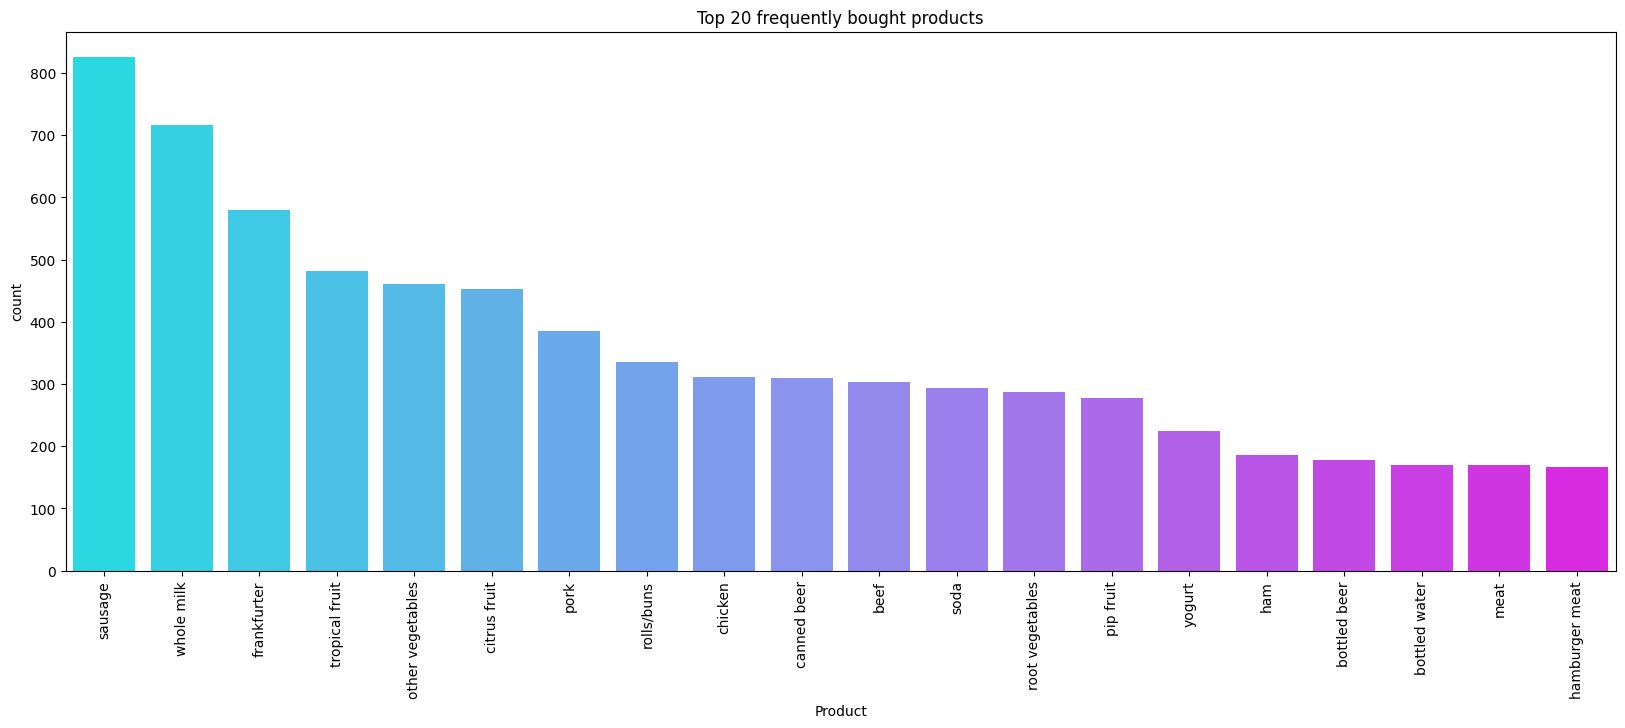

In [9]:
plt.rcParams['figure.figsize']=20,7
sns.countplot(data=data, x=data['Item 1'],
             order = data['Item 1'].value_counts().head(20).index,
             palette='cool')
plt.xticks(rotation=90)
plt.xlabel('Product')
plt.title('Top 20 frequently bought products')
plt.show()

In [11]:
records = []
for i in range(0, len(data)):
    records.append([str(data.values[i,j]) for j in range(1, data.values[i, 0]+1)])

In [12]:
counts = [len(record) for record in records]
print(f'50 percent of the transactions are having items below or equal to {np.quantile(counts, .5)} only')
print(f'particular transaction having a maximum of {np.quantile(counts, 1)} items in it')

50 percent of the transactions are having items below or equal to 3.0 only
particular transaction having a maximum of 32 items in it


In [13]:
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
onehot = te.fit_transform(records)
onehot = pd.DataFrame(onehot, columns = te.columns_)

In [14]:
print(f'Shape of encoded data: {onehot.shape[0]} rows and {onehot.shape[1]} columns')

Shape of encoded data: 9835 rows and 169 columns


In [15]:
onehot = onehot.loc[:, ['bottled beer', 'bottled water', 'brandy', 'brown bread', 'butter', 'syrup',
                    'sweet spreads', 'beverages', 'berries', 'beef', 'bathroom cleaner', 'baking powder', 'bags',
                    'baby food', 'baby cosmetics', 'Instant food products', 'tea', 'toilet cleaner', 'vinegar', 'waffles', 'whisky',
                    'white bread', 'white wine', 'yogurt', 'zwieback', 'whole milk', 'whipped/sour cream', 'abrasive cleaner']]

In [16]:
print(f'Shape of encoded data: {onehot.shape[0]} rows and {onehot.shape[1]} columns')

Shape of encoded data: 9835 rows and 28 columns


In [17]:
from mlxtend.frequent_patterns import apriori, association_rules

frequent_itemsets=apriori(onehot, min_support=0.0001, use_colnames=True, max_len=3)
frequent_itemsets

,support,itemsets
0,0.080529,(bottled beer)
1,0.110524,(bottled water)
2,0.004169,(brandy)
3,0.064870,(brown bread)
4,0.055414,(butter)
...,...,...
1006,0.010880,"(whole milk, whipped/sour cream, yogurt)"
1007,0.000712,"(whole milk, yogurt, abrasive cleaner)"
1008,0.000102,"(yogurt, whipped/sour cream, abrasive cleaner)"
1009,0.000203,"(whole milk, whipped/sour cream, zwieback)"


In [18]:
rules=association_rules(frequent_itemsets)

In [19]:
rules.shape

(164, 14)

In [20]:
targeted_rules = rules[rules['antecedents'] == {'baby food'}].copy()

In [21]:
filtered_rules = targeted_rules[(targeted_rules['confidence'] > 0.85) &
                                (targeted_rules['lift'] > 1.00)]

<Axes: xlabel='antecedents', ylabel='consequents'>

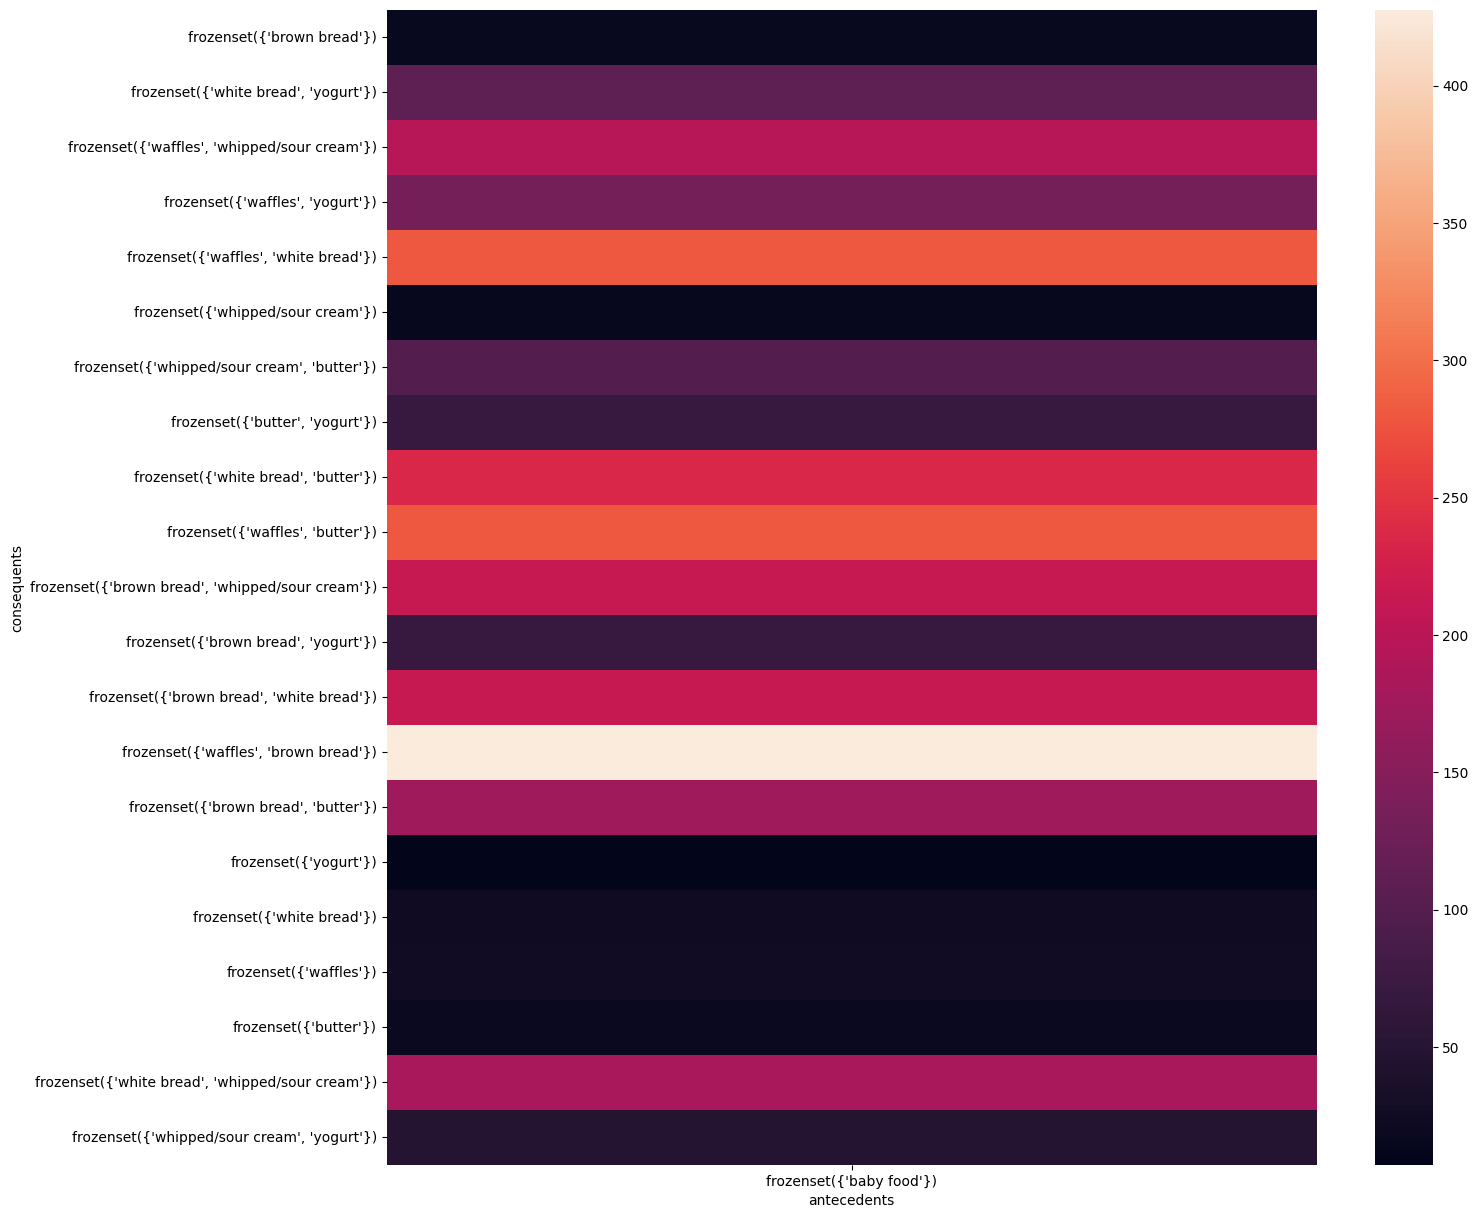

In [22]:
support_table = filtered_rules.pivot(index='consequents', columns='antecedents', values='lift')
sns.heatmap(support_table)

In [23]:
rules['antecedent'] = rules['antecedents'].apply(lambda antecedent: list(antecedent)[0])
rules['consequent'] = rules['consequents'].apply(lambda consequent: list(consequent)[0])
rules['rule'] = rules.index
coords = rules[['antecedent','consequent','rule']]

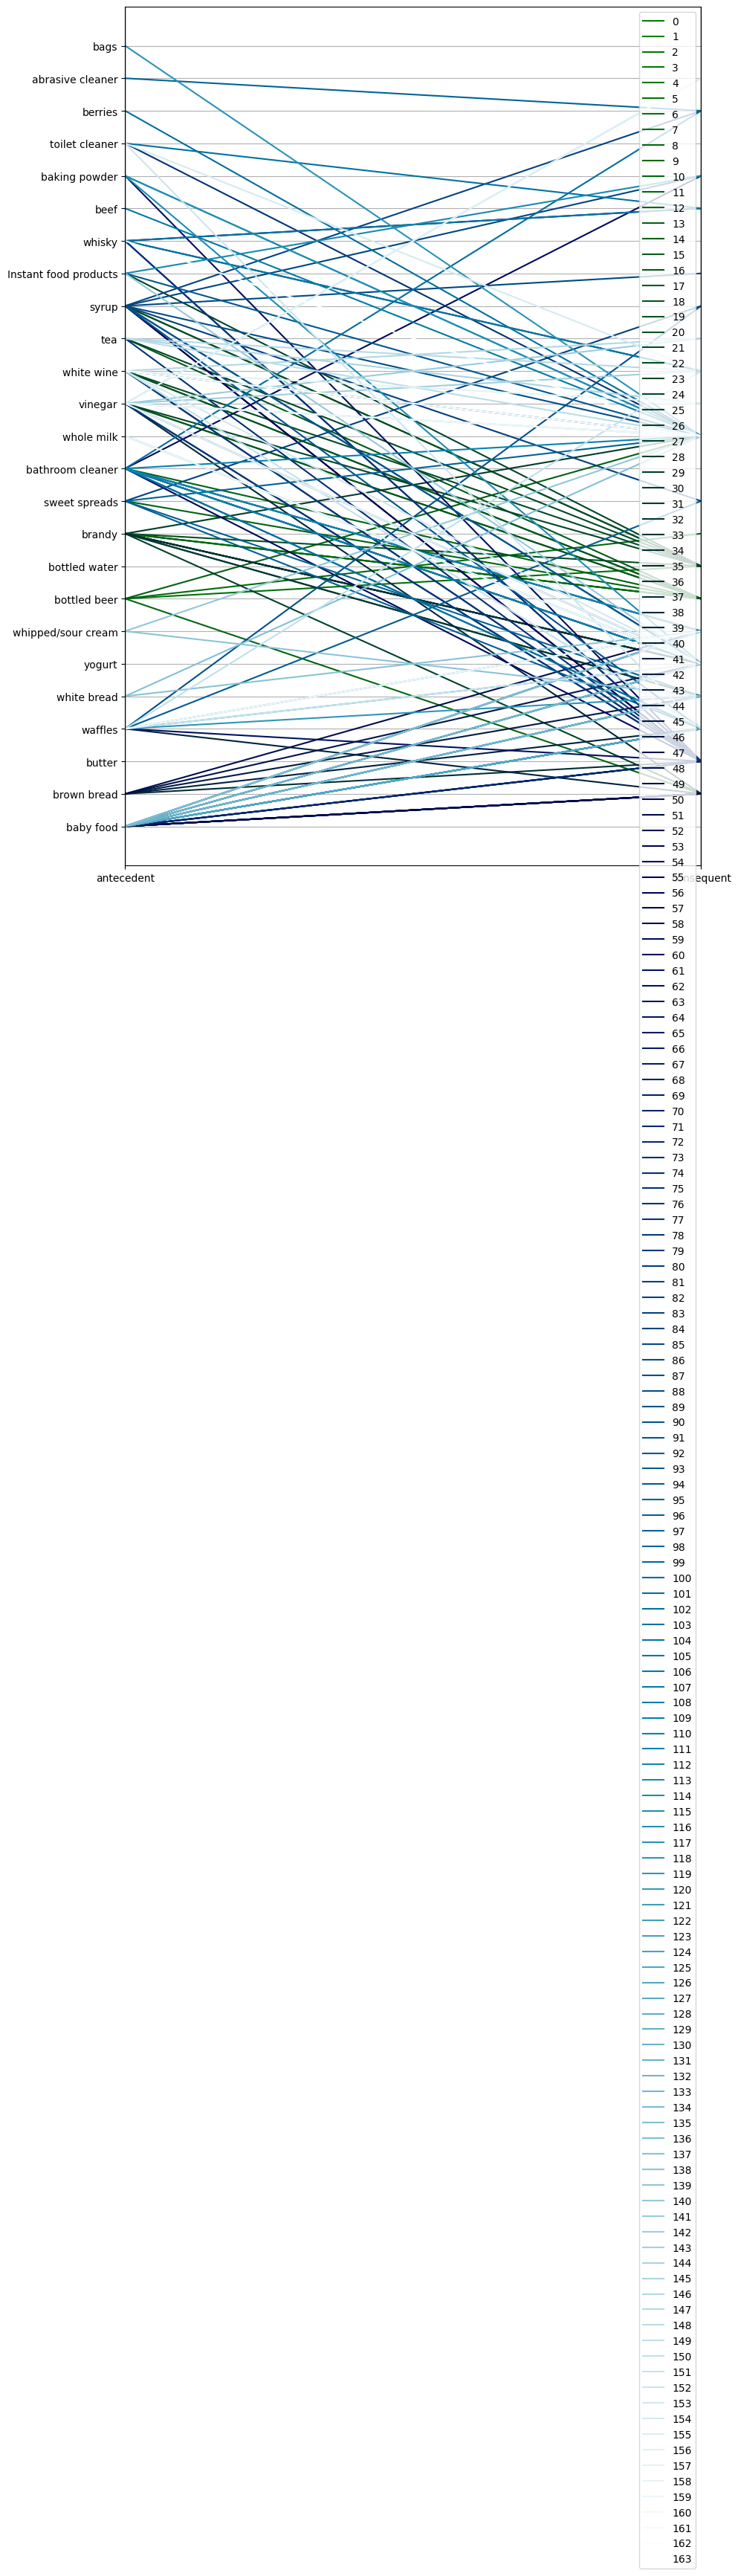

In [24]:
from pandas.plotting import parallel_coordinates

plt.rcParams['figure.figsize']=10,15
parallel_coordinates(coords,'rule', colormap = 'ocean')
plt.show()